In [13]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import numpy as np
import matplotlib.pyplot as plt
import os


In [14]:
link = "files/perecederos.csv"
data = pd.read_csv(link) 

In [15]:
data

,Flight_ID,Aeronave,DepartureStation,ArrivalStation,Destination_Type,Origin_Type,STD,STA,Capacity,Passengers,Bookings,Year,Quantity,Ocupacy,Month,Time,Day
0,ab954014077430bd842cfa305a55c0f8,XA-VBY,AT,AZ,Ciudad Fronteriza,Ciudad Principal,2023-10-19 11:40:00,2023-10-19 14:25:00,240,229.0,157.0,2023,4,0.954167,10,165.0,3
1,efd86c996035dacdca7a0ccb2560dda1,XA-VIX,BM,AV,MX Amigos y Familia,Ciudad Fronteriza,2023-07-03 00:55:00,2023-07-03 04:55:00,186,197.0,109.0,2023,1,1.059140,7,240.0,0
2,d0987ee648eea254063bfe2b39571b67,XA-VAP,BA,AB,Playa,Ciudad Principal,2023-02-10 08:40:00,2023-02-10 09:50:00,186,162.0,90.0,2023,3,0.870968,2,70.0,4
3,8fa200a3d1ce23ef6802a74847e030b8,XA-VXC,BM,AV,MX Amigos y Familia,Ciudad Fronteriza,2023-10-10 00:55:00,2023-10-10 04:55:00,240,210.0,116.0,2023,5,0.875000,10,240.0,1
4,281ae1ba6c678889e306cd9cae468daf,XA-VAM,AO,AR,Playa,Ciudad Principal,2023-12-13 12:10:00,2023-12-13 12:50:00,180,110.0,78.0,2023,2,0.611111,12,40.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87089,9bbd9f3a2bbcaeae864d17e3ee544d2c,XA-VAE,AT,BT,Playa,Ciudad Principal,2023-12-06 12:50:00,2023-12-06 16:10:00,186,191.0,119.0,2023,5,1.026882,12,200.0,2
87090,d9ef769565064b1ff1ad90d6d18f69cb,XA-VYF,AO,BT,Playa,Ciudad Principal,2023-12-26 06:20:00,2023-12-26 10:10:00,180,166.0,89.0,2023,4,0.922222,12,230.0,1
87091,598035669a4f0fa2ce1207977932df9e,XA-VAI,AW,BT,Playa,Ciudad Principal,2023-12-28 10:25:00,2023-12-28 13:50:00,180,142.0,54.0,2023,8,0.788889,12,205.0,3
87092,cc7c1c5e6fd132fd0bdab3a35aac33c0,XA-VBK,BM,BT,Playa,Ciudad Fronteriza,2023-12-29 07:30:00,2023-12-29 14:50:00,240,189.0,86.0,2023,15,0.787500,12,440.0,4


In [61]:
#Sections
# This sections 
sections = [
    # 'Aeronave', Se descarta por que se calcula con capacidad 
    # 'DepartureStation', Se descarta por que tiene el mismo comportamiento que tipo de origen
    # 'ArrivalStation', Mismo comportamiento de tipo de destino
    'Destination_Type',
    'Origin_Type',
    'Day',
    'Month', 
]

In [62]:
def makegrap (model, sec):

    lenght = len(model)
    m = model[[sec,'Quantity']]
    groups = model[sec].unique()
    print(groups)
    m = m.groupby(sec).sum().reset_index()
    # print(m)
    m['Cantidad'] = model.groupby(sec).size().reset_index(name='Cantidad')['Cantidad']
    m['Prom'] = m['Quantity'] / m['Cantidad']
    print(m)

    m = m.sort_values('Prom', ascending=False)
    y1 = m['Prom']
    y2 = m['Quantity']
    x =  m[sec]

    plt.figure(figsize=(10, 6))
    plt.plot(x, y1, marker='o', label='Prom')
    plt.title('Tabla1')
    plt.xlabel(sec)
    plt.ylabel('Prom')
    plt.grid(True)
    plt.legend()

    m = m.sort_values('Quantity', ascending=False)

    y1 = m['Prom']
    y2 = m['Quantity']
    x =  m[sec]


    # Creación de la segunda gráfica (Cantidad)
    plt.figure(figsize=(10, 6))
    plt.plot(x, y2, marker='o', label='Cantidad')
    plt.title('Tabla2')
    plt.xlabel(sec)
    plt.ylabel('Cantidad')
    plt.grid(True)
    plt.legend()

    # Mostrar las gráficas
    plt.show()

    
    # plt = m.plot(x=sec, y=['Quantity'], kind='bar', figsize=(10, 5))
    # plt.set_xlabel(sec)
    # plt.set_ylabel('Quantity')
    # plt.set_title('Quantity of products by '+sec)
    # plt.set_xticklabels(x)
    # plt.show()

    # plt = m.plot(x=sec, y=['Prom'], kind='bar', figsize=(10, 5))
    # plt.set_xlabel(sec)
    # plt.set_ylabel('Prom')
    # plt.set_title('Quantity of products by '+sec)
    # plt.set_xticklabels(x)
    # plt.show()  
    
    # print(m)

['Ciudad Fronteriza' 'MX Amigos y Familia' 'Playa' 'Ciudad Principal'
 'Ecoturismo']
      Destination_Type  Quantity  Cantidad      Prom
0    Ciudad Fronteriza     65022     10135  6.415590
1     Ciudad Principal    166315     38115  4.363505
2           Ecoturismo     20268      4747  4.269644
3  MX Amigos y Familia     65271     14351  4.548185
4                Playa    146298     19746  7.408994


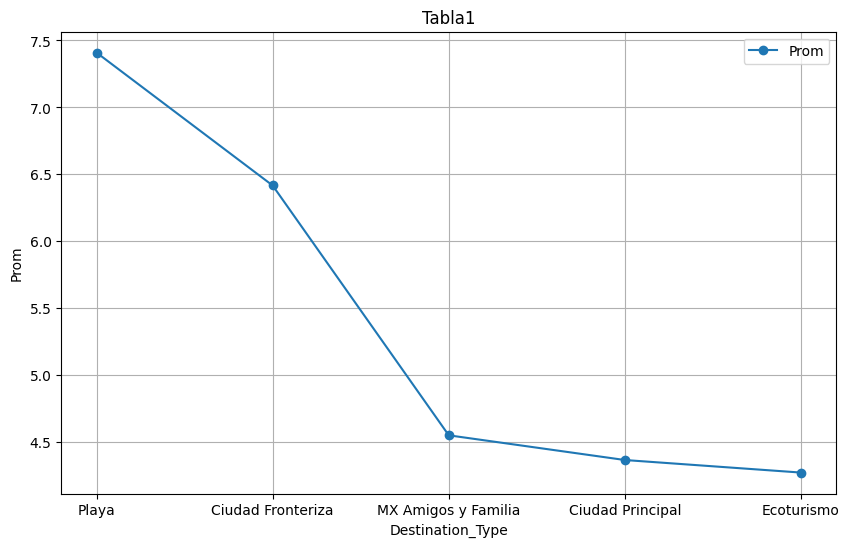

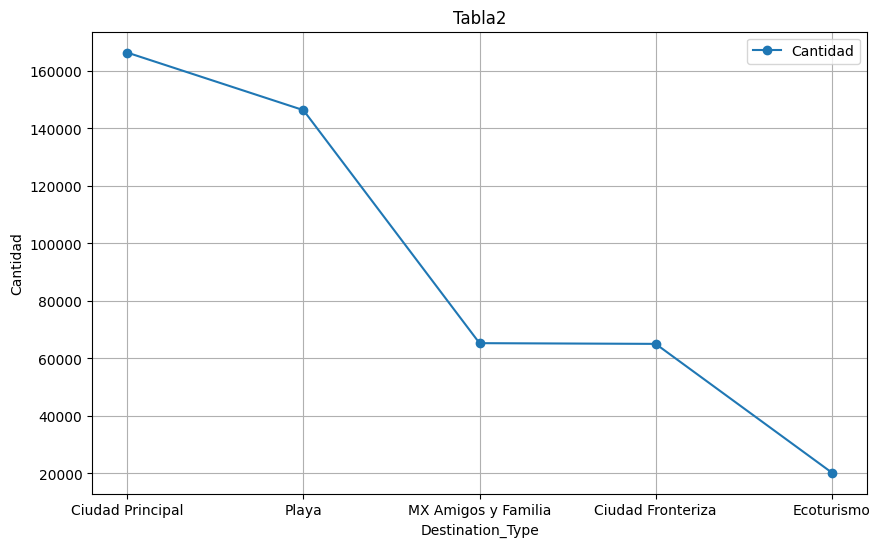

['Ciudad Principal' 'Ciudad Fronteriza' 'Playa' 'MX Amigos y Familia'
 'Ecoturismo']
           Origin_Type  Quantity  Cantidad      Prom
0    Ciudad Fronteriza     64326      9779  6.577973
1     Ciudad Principal    204841     40131  5.104308
2           Ecoturismo     17594      4421  3.979643
3  MX Amigos y Familia     72622     14390  5.046699
4                Playa    103791     18373  5.649105


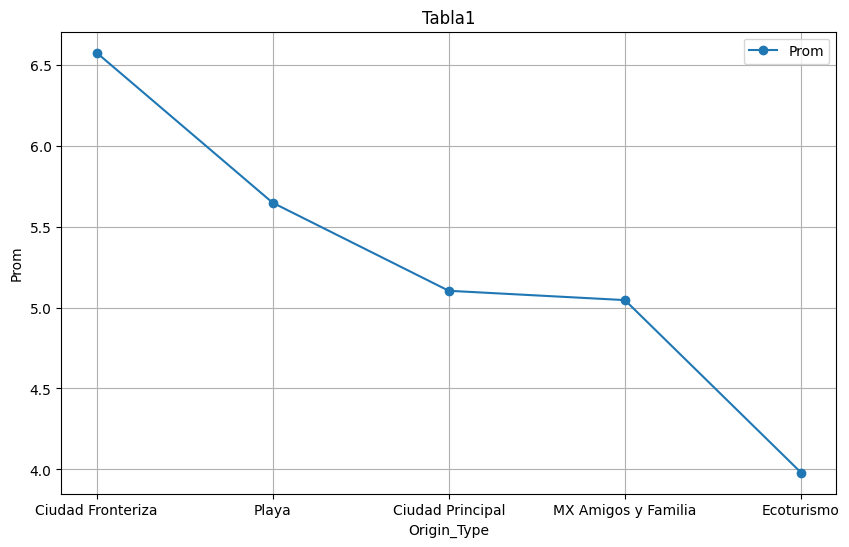

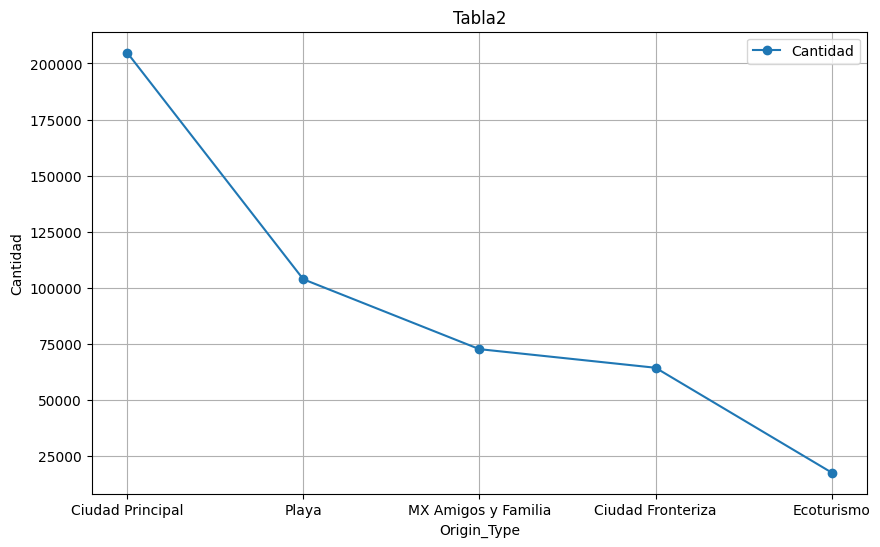

[3 0 4 1 2 6 5]
   Day  Quantity  Cantidad      Prom
0    0     69265     13277  5.216916
1    1     62646     11739  5.336570
2    2     64752     12242  5.289332
3    3     70611     12910  5.469481
4    4     74095     13419  5.521648
5    5     59811     11139  5.369513
6    6     61994     12368  5.012451


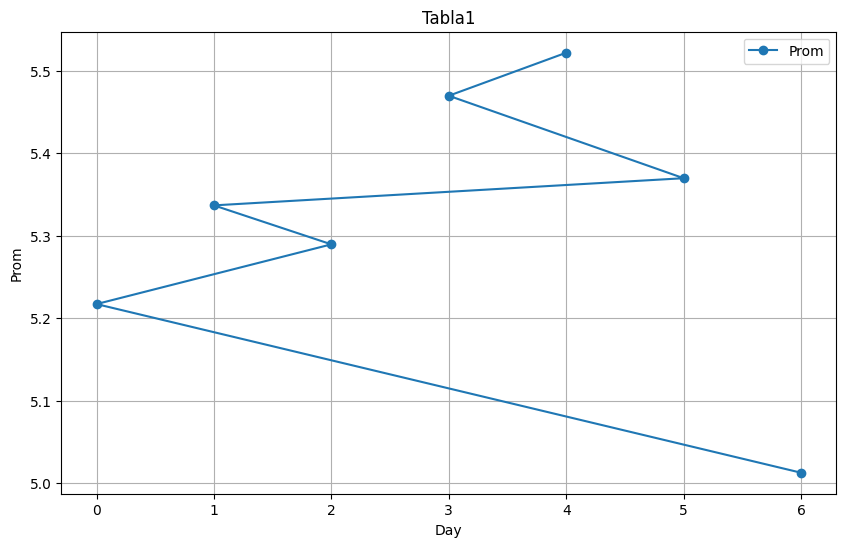

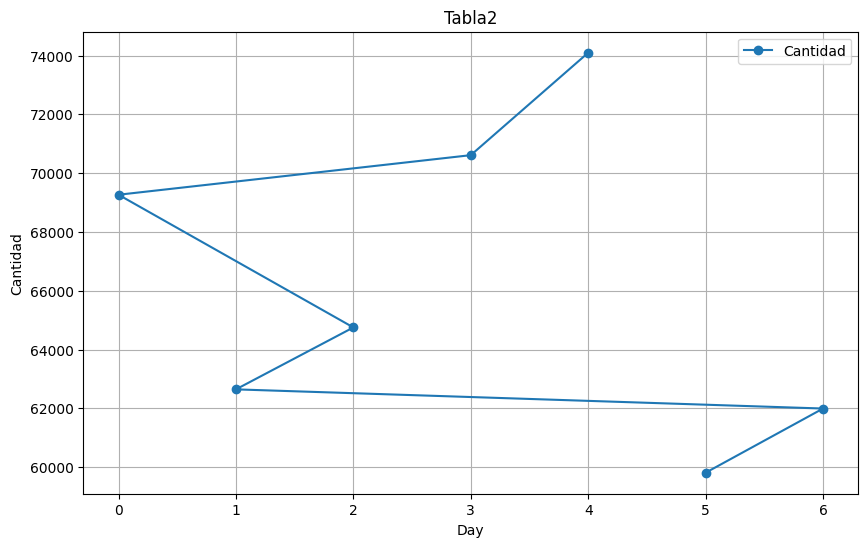

[10  7  2 12  6  1  3  8  9 11  4  5]
    Month  Quantity  Cantidad      Prom
0       1     32612      6446  5.059262
1       2     27648      5738  4.818404
2       3     35130      7019  5.004986
3       4     38085      7312  5.208561
4       5     37832      7217  5.242067
5       6     40486      7408  5.465173
6       7     48977      8271  5.921533
7       8     48397      8189  5.910001
8       9     38817      7290  5.324691
9      10     39267      7540  5.207825
10     11     36872      7299  5.051651
11     12     39051      7365  5.302240


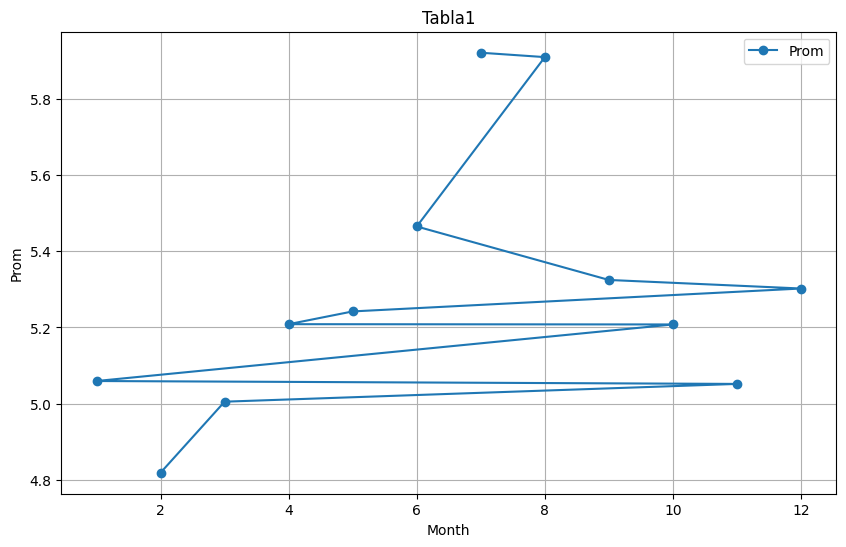

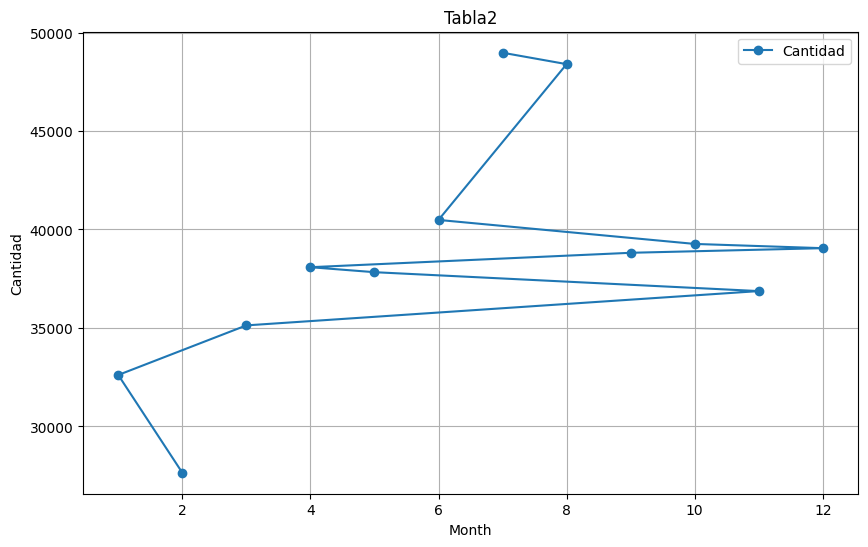

In [63]:
for s in sections:
    makegrap(data,s)

In [ ]:
#Hacer plot de las graficas

